# Project Temperature/Time Series

## Time Series Data

"An obvious characteristic of time series data that distinguishes it from cross-sectional data is temporal ordering." - Introductory Econometrics, J. Wooldridge

Time Series data has (or can have) the following components:
1. Trend
- Seasonality
- Remainder:
    - Randomness
    - Time Dependence

## Time Series Analysis

-> if we dont have time dependence, we dont need time series analysis

-> does the temperature of yesterday have a meaning on the temp of today? if yes -> time dependence

Time Series Analysis is a field of statistical Analysis that deals with modelling **time dependence**. The other properties of time series will have to be taken into account in order to model it, but the time dependence is what we try to understand in time series analysis. Thereby, we can extract meaningful information from the past.

Ask yourself the question:
Is there meaningful information in the past observations of the time series that cannot be captured by any covarying variable?
If the answer is **yes**, that is when time series analysis comes into play. This could be the case if we either can't model any other relationship or we cannot access the necessary data.

## Topics we will cover this week

**Time Series:**

- Decompose time series data into its different components
- Use a naive forecast as a baseline model
- Learn how to use Autoregressive (AR) and Autoregressive-Integrated-Moving-Average (ARIMA) Models to predict the future.
- Evaluate your forecasts

**Miscellaneous:**

- Distribution Functions
- Python Namespaces
- Useful Python Modules
- Plotting on Maps

## Main Project Goal

- Understand the purpose of and the idea behind time series analysis
- Be able to make short term temperature forecasts

# Components of Time Series

- Time series data consists of up to 4 components:
    1. Trend
    2. Seasonality (or Cyclicality)
    3. Remainder:
        - Randomness
        - Time Dependece
- The component we are most interested in is the **Time Dependence**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the size of the matplotlib.figure to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
def plot_ts(series, plot_title, hline=0, plot_hline=False):
    '''
    Plots the specified pd.DataFrame or pd.Series with the given title.
    
    Parameters:
    -----------
    
    series:     time series to plot
    plot_title: title of the plot
    hline:      y value at which to plot a horizontal line
    plot_hline: plots a horizontal line at hline if True, otherwise not
    '''
    series.plot()
    plt.title(plot_title, fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('y-values', fontsize=12)
    if plot_hline:
        plt.axhline(hline, c='r')
    plt.show()

## 1) Trend

In [5]:
# We want to have time on the x-axis
x = pd.date_range(start='2017-01-01', end='2019-12-31', freq='D')
x

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [9]:
# list(range(1,11))
# np.arange(1,11,1)
# np.linspace(1, 10, num=20) # creates list with evenly spaced datapoints from 1 to 10 with 20 elements

In [10]:
# Choose y to be linearly increasing in time
y = np.linspace(1, len(x)/30, len(x))
len(y)

1095

In [11]:
assert len(x) == len(y)

In [12]:
# Combine them into a DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df.set_index('x', inplace=True)
df.head()

,y
x,
2017-01-01,1.000000
2017-01-02,1.032450
2017-01-03,1.064899
2017-01-04,1.097349
2017-01-05,1.129799


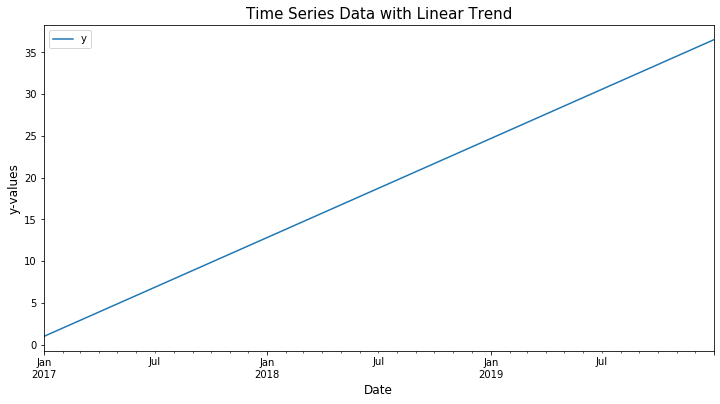

In [13]:
# Look at time series data with a linear trend
plot_ts(df, 'Time Series Data with Linear Trend')

In [14]:
# Look at time series data with an exponential trend
df['y_exp'] = df['y']**2

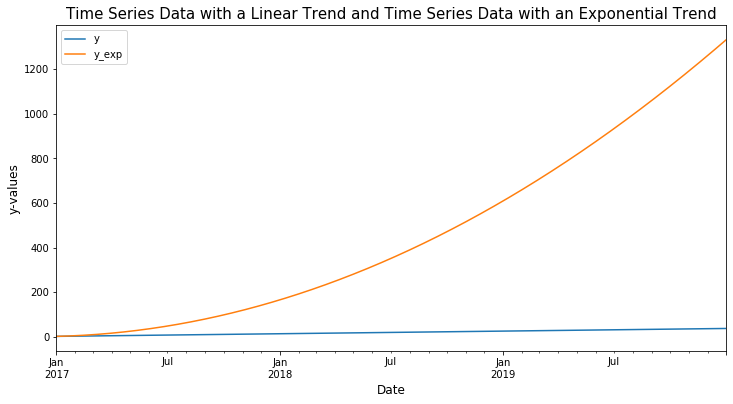

In [15]:
plot_ts(df, 'Time Series Data with a Linear Trend and Time Series Data with an Exponential Trend')

## 2) Seasonality

In [16]:
# Sometimes time series data has a seasonal component
df['seasonal'] = np.sin(df['y'])*5
df.head()

,y,y_exp,seasonal
x,,,
2017-01-01,1.000000,1.000000,4.207355
2017-01-02,1.032450,1.065952,4.292788
2017-01-03,1.064899,1.134011,4.373701
2017-01-04,1.097349,1.204175,4.450009
2017-01-05,1.129799,1.276446,4.521632


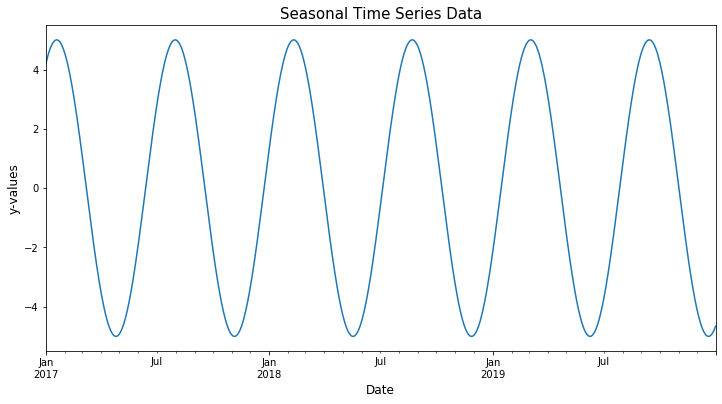

In [17]:
# Plot the seasonal component
plot_ts(df['seasonal'], 'Seasonal Time Series Data')

In [18]:
# Combine Trend and seasonality
df['trend_seasonal'] = df['y'] + df['seasonal']
df.head()

,y,y_exp,seasonal,trend_seasonal
x,,,,
2017-01-01,1.000000,1.000000,4.207355,5.207355
2017-01-02,1.032450,1.065952,4.292788,5.325238
2017-01-03,1.064899,1.134011,4.373701,5.438600
2017-01-04,1.097349,1.204175,4.450009,5.547358
2017-01-05,1.129799,1.276446,4.521632,5.651431


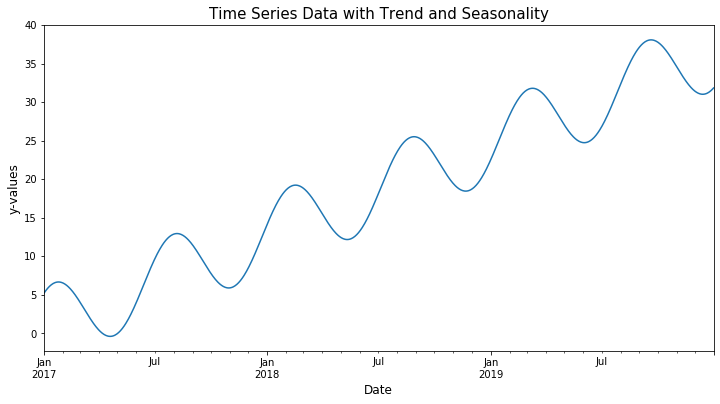

In [19]:
plot_ts(df['trend_seasonal'], 'Time Series Data with Trend and Seasonality')

## 3) Remainder

### 3.1) Randomness

When we talk about randomnes in this context we usually mean **White Noise**

In [20]:
# Create and plot white noise
df['white_noise'] = np.random.normal(size=len(df))
df.head()

,y,y_exp,seasonal,trend_seasonal,white_noise
x,,,,,
2017-01-01,1.000000,1.000000,4.207355,5.207355,-1.190904
2017-01-02,1.032450,1.065952,4.292788,5.325238,0.430731
2017-01-03,1.064899,1.134011,4.373701,5.438600,-0.934432
2017-01-04,1.097349,1.204175,4.450009,5.547358,0.945075
2017-01-05,1.129799,1.276446,4.521632,5.651431,0.465705


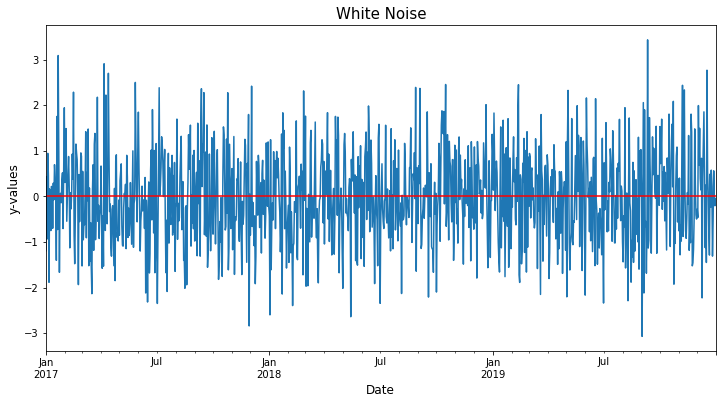

In [22]:
plot_ts(df['white_noise'], 'White Noise', plot_hline=True)

# if we see only noise, no time dependence

### 3.2) Time Dependence

Keep in mind, the remainder consists of two components itself:
- Time Dependence
- Randomness

We will first be looking at the Time Dependence part.

#### Extreme Case: Random Walk

$y_{t+1} = y_t + \epsilon_t$

where $\epsilon_t \sim N(0, \sigma^2)$ is an iid random variable with a standard normal distribution.

In [31]:
# Create and plot a random walk with np.cumsum
df['random_walk'] = np.random.normal(size=len(df))

In [32]:
df['random_walk'] = np.cumsum(df['random_walk'])
df.head()

,y,y_exp,seasonal,trend_seasonal,white_noise,random_walk
x,,,,,,
2017-01-01,1.000000,1.000000,4.207355,5.207355,-1.190904,1.144029
2017-01-02,1.032450,1.065952,4.292788,5.325238,0.430731,1.110790
2017-01-03,1.064899,1.134011,4.373701,5.438600,-0.934432,0.273843
2017-01-04,1.097349,1.204175,4.450009,5.547358,0.945075,1.231930
2017-01-05,1.129799,1.276446,4.521632,5.651431,0.465705,2.041274


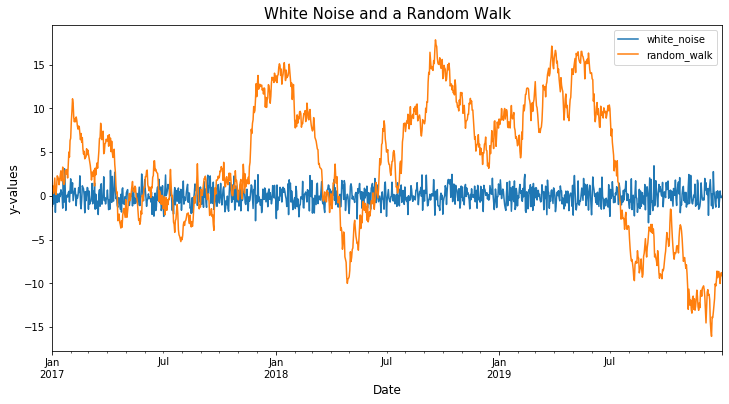

In [33]:
plot_ts(df[['white_noise', 'random_walk']], 'White Noise and a Random Walk')

#### Less extreme and more interesting case: Time Dependent Stationary Time Series

For example:

$y_{t+1} = 0.8*y_t + \epsilon_t$

In [34]:
# Create and plot a simple time dependent series
# observation at timestep zero t_0
y_0 = 0

# observation at timestep 1 t_1
y_1 = 0.8 * y_0 + np.random.normal()

In [35]:
y_1

2.201695511160755

In [36]:
stationary_series = [y_0, y_1]

In [37]:
# Write a loop in order to create the other values of the process

for i in range(len(df) - 2):
    last_observation = stationary_series[-1]
    error_term = np.random.normal()
    y_t = 0.8 * last_observation + error_term
    stationary_series.append(y_t)

In [38]:
len(stationary_series)

1095

In [39]:
df['stationary'] = stationary_series

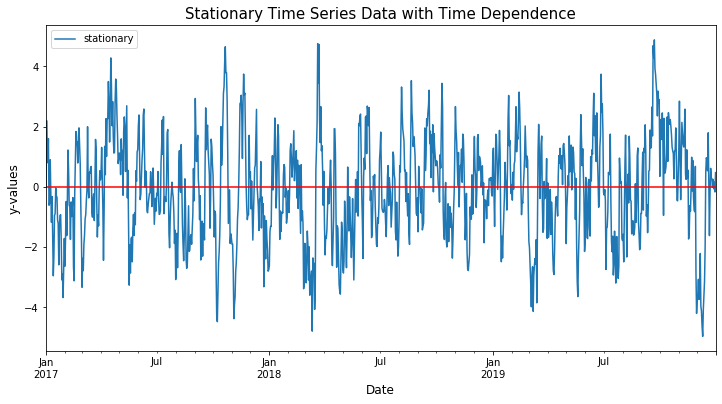

In [40]:
plot_ts(df[['stationary']], 'Stationary Time Series Data with Time Dependence', plot_hline=True)

In [41]:
# Check for the mean of the time series data
df.stationary.mean()

-0.09861133917267872

In [42]:
df.white_noise.mean()

-0.015175704516330178

## All of the components can be combined

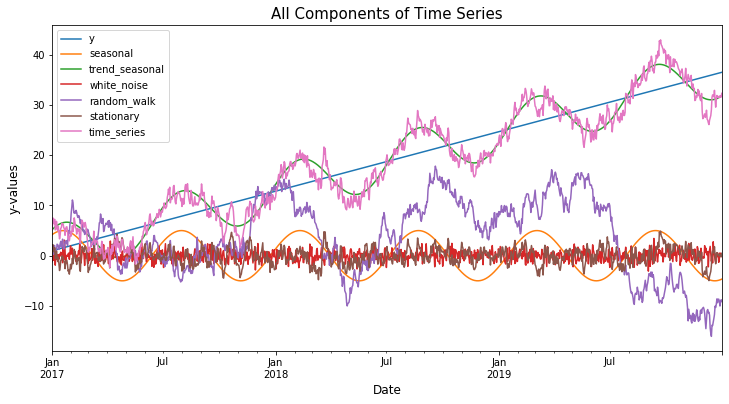

In [43]:
# Combine and plot all of the components
df['time_series'] = df['trend_seasonal'] + df['stationary']
plot_ts(df.loc[:, df.columns != 'y_exp'], 'All Components of Time Series')